In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa.display
import librosa


In [50]:


piano_audio = "piano-c.wav"
violin_audio = "violin-c4.wav"

In [17]:

ipd.Audio(piano_audio)

In [42]:
ipd.Audio(violin_audio)

In [57]:

piano_ad,sr = librosa.load(piano_audio)
violin_ad,_ = librosa.load(violin_audio)

finding samples of each audio file

In [52]:

print(piano_ad.shape)
print(violin_ad.shape)


(33968,)
(71318,)


In [53]:

piano_fft = np.fft.fft(piano_ad)
violin_fft = np.fft.fft(violin_ad)

In [54]:

print(piano_fft.shape)
print(violin_fft.shape)

(33968,)
(71318,)


as we can see the fourier transforms are equal to samples because we are gonna have same frequency bins as same are samples in times domains.

In [55]:

print(piano_ad[0])
print(violin_ad[0])

-0.3460831
-0.0005311137


Here we got this fft values for magnitude and phase where in ai applications we dont care much about the phase and use magnitude to catch the frequency so we will remove the imaginary part as does not contribute here and keeping the only magnitude coefficients.

In [56]:

magnitude_spectrum_piano = np.abs(piano_ad)
magnitude_spectrum_violin = np.abs(violin_ad)

In [31]:
def plot_magnitude_spectrum(title,signal,sr):
    ft = np.fft.fft(signal)
    magnitude_spectrum = np.abs(ft)
    
    plt.figure(figsize=(18,5))
    frequency = np.linspace(0.0,sr,len(magnitude_spectrum))
    plt.plot(frequency,magnitude_spectrum)
    plt.title(title)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Magnitude Spectrum')
    plt.show()

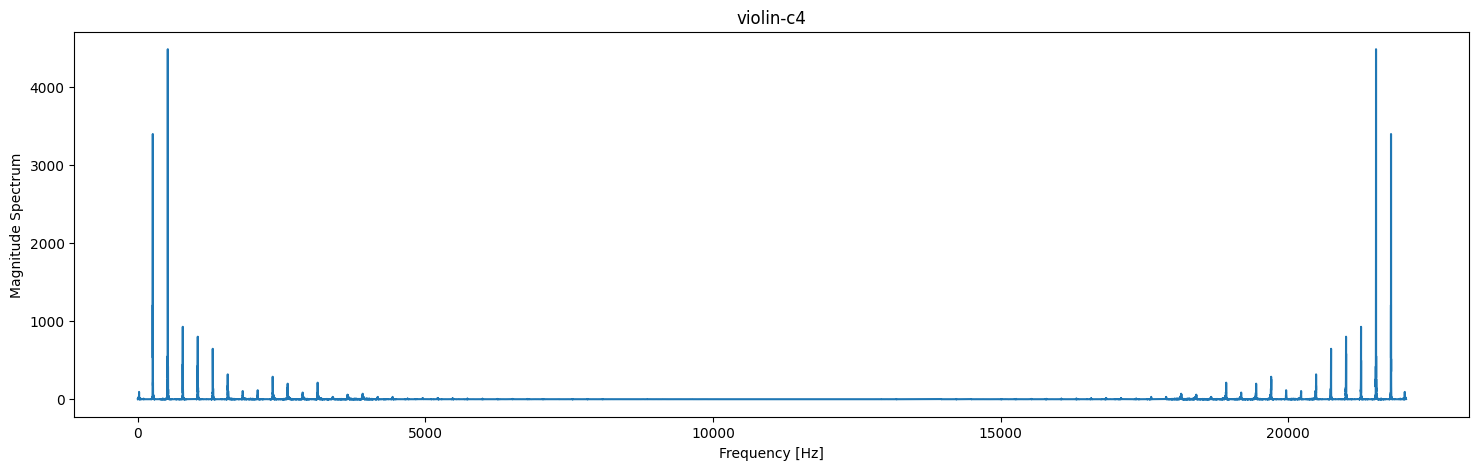

In [58]:
plot_magnitude_spectrum("violin-c4",violin_ad,sr)

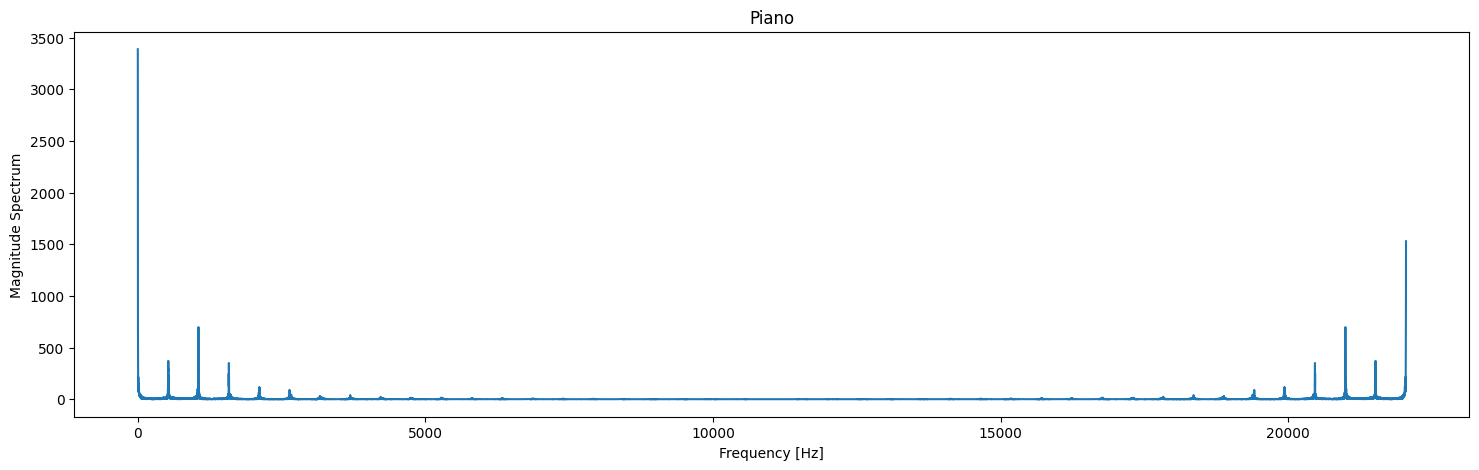

In [34]:
plot_magnitude_spectrum("Piano",piano_ad,sr)

As we can see the frequency starts copying itself in the end of each sounds after N/2 where N = no. of samples also known as nyquist frequency which is the threshold point for reconstructing the signal without allising This mirroring effect occurs due to aliasing, which happens when frequencies higher than the Nyquist frequency are folded back into the frequency range below it.

### Aliasing Explained:
When a signal is sampled, its frequency spectrum is repeated periodically at intervals of the sampling rate Fs
 Mathematically, the sampled signal's spectrum Xs (F)
 (F) can be expressed as:
 
 Xs(F) = summation of k(indices) from -infinity to infinity X(F-k.Fs)
 
Here X(F) is the original spectrum of the continuous signal, and k
k represents the periodic repetitions of the spectrum.

### Periodic Repetition:

The original signal spectrum is repeated at multiples of the sampling rate Fs.
Frequencies between 0 and Fn are preserved correctly in the first period.

### Folding (Mirroring):

Frequencies above 𝑓N are indistinguishable from their counterparts below 
fN because they overlap due to periodic repetition.

A frequency component at \( f > f_N \) appears as:

\[
f' = f_s - f
\]

in the range \( [0, f_N] \), creating a mirrored effect.

### Consequences of Mirroring and Nyquist Frequency

#### Frequency Range of Interest:
- The range \( [0, f_N] \) contains all unique frequency information in the signal.
- Frequencies beyond \( f_N \) are redundant because they mirror frequencies within \( [0, f_N] \).

#### Nyquist Frequency as a Threshold:
- If frequencies higher than \( f_N \) exist in the signal, they must be removed using a **low-pass filter** before sampling (**anti-aliasing filter**). 
- Otherwise, **aliasing** will corrupt the signal.

  

In [59]:
def plot_magnitude_spectrum_without_mirroring(title,signal,sr,fr_ratio):
    ft = np.fft.fft(signal)
    magnitude_spectrum = np.abs(ft)
    
    plt.figure(figsize=(18,5))
    frequency = np.linspace(0.0,sr,len(magnitude_spectrum))
    num_frequency_bins = int(fr_ratio*len(magnitude_spectrum))
    plt.plot(frequency[:num_frequency_bins],magnitude_spectrum[:num_frequency_bins])
    plt.title(title)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Magnitude Spectrum')
    plt.show()

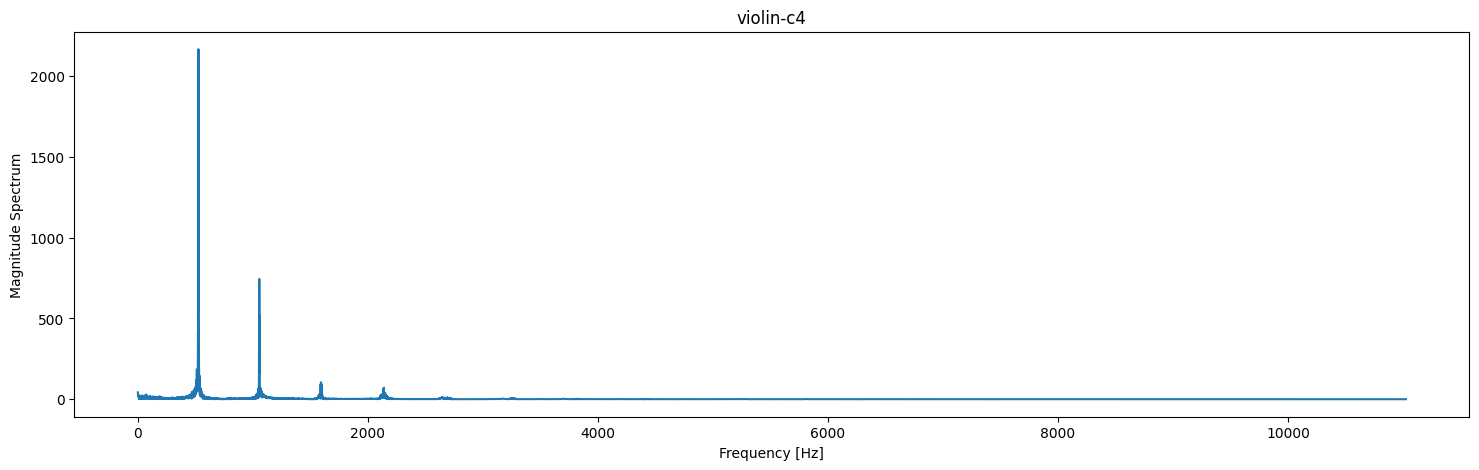

In [60]:
plot_magnitude_spectrum_without_mirroring("violin-c4",piano_ad,sr,fr_ratio=0.5)

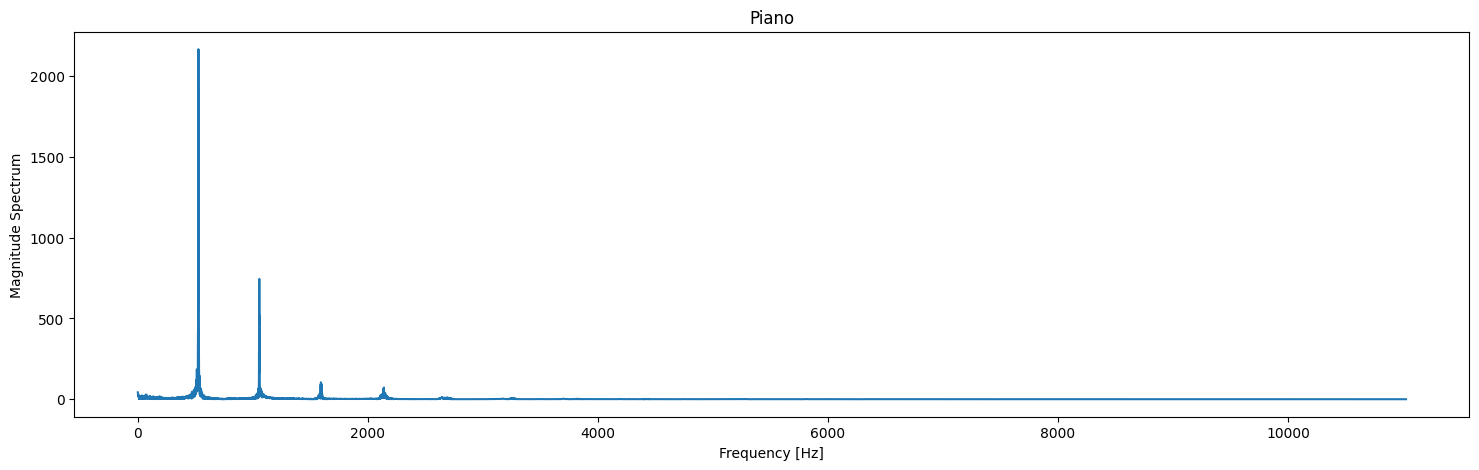

In [61]:
plot_magnitude_spectrum_without_mirroring("Piano",piano_ad,sr,fr_ratio=0.5)

we can see both have similar kind of frequency because they are playing same node (c4) which create kind of same energy

Also we can see it has all the relevant  frequency till the half of sampling rate or nyquist frequency and can reconstruct the signal without allising.